In [ ]:
#| echo: false
from data import *
from utils import *
from model import *

/Users/ali/miniconda3/envs/dl/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/ali/miniconda3/envs/dl/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  Referenced from: <F0D48035-EF9E-3141-9F63-566920E60D7C> /Users/ali/miniconda3/envs/dl/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <699F2277-8EEE-3C07-BE7E-3B893740EE04> /Users/ali/miniconda3/envs/dl/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")


In [ ]:
#| echo: false
#plt.style.use('dark_background')

In [ ]:
#| echo: false
#| output: false
train_df = get_mnist_df()
valid_df = get_mnist_df(train=False)
train_dl, valid_dl = get_dls(train_df, valid_df, bs=64)
dls = DataLoaders(train_dl, valid_dl)
dls = dls.to('cuda')
train_df.shape, valid_df.shape, len(train_dl), len(valid_dl)

FileNotFoundError: [Errno 2] No such file or directory: 'data/mnist_png/training'

In [ ]:
model = Autoencoder()
model.summary()

In [ ]:
learner = Learner(dls, Autoencoder(), loss_func=MSELossFlat(), ).to_fp16()
learner.fine_tune(1, 3e-2)

epoch,train_loss,valid_loss,time
0,5012.817871,4396.054199,00:10


epoch,train_loss,valid_loss,time
0,3545.044189,3529.446045,00:09


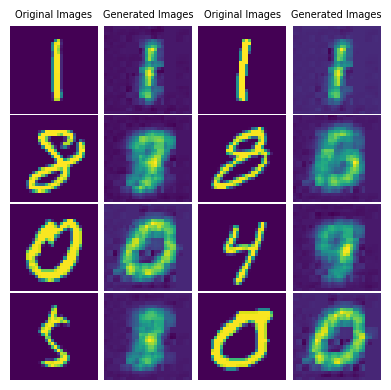

In [ ]:
plt_subs(*get_valid_results(learner.model, dls.train), size=2)

In [ ]:
valid_df.shape

(10000, 2)

## Latent space exploration

#### plot on the left shows how the latent space looks for our validation set
##### --> this would be the encoded representation of ~10,000 images mapped into 2D space. The color of the points indicates their actual labels --> a Nine (9) is red vs purple for a Zero (0)


#### the images on the right are the reconstructed images (decoded representations) of our given latent values (marked on the scatter plot with white X marks)

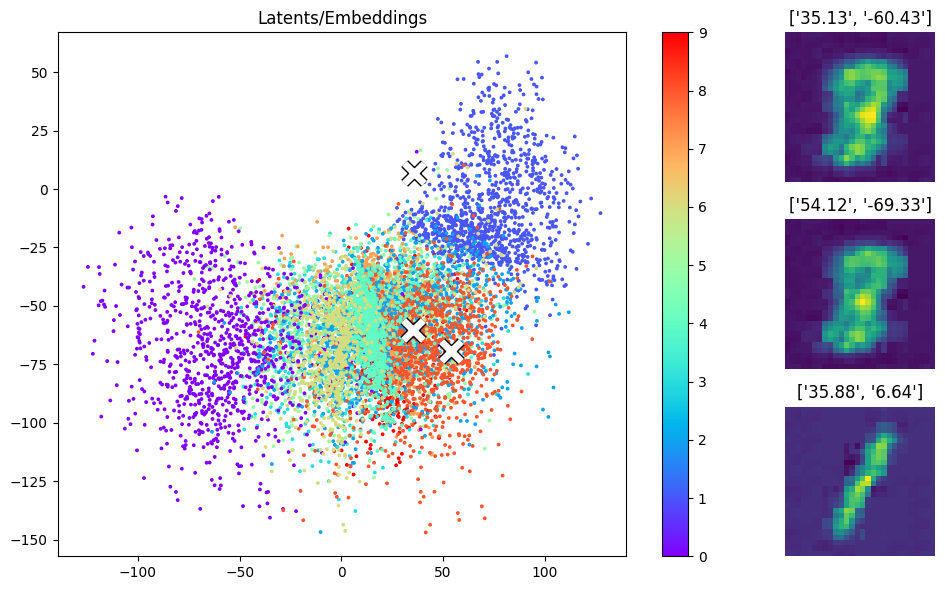

In [ ]:
plot_latent_regen(learner.model)